In [4]:
import numpy as np

h = 6.626e-34       # J·s
c = 3.0e8           #  m/s
e = 1.602e-19

wavelengths_nm = [557.49, 599.51, 579.51, 549.00]
wavelengths_m = [wl * 1e-9 for wl in wavelengths_nm]

Eg_eV = [(h * c) / wl / e for wl in wavelengths_m]

epsilon = [155507 + 6.67054e13 * np.exp(-Eg / 0.10551) for Eg in Eg_eV]

results = [(i+1, wl, Eg, eps) for i, (wl, Eg, eps) in enumerate(zip(wavelengths_nm, Eg_eV, epsilon))]
results

[(1, 557.49, 2.2257331432625755, 201503.009986328),
 (2, 599.51, 2.0697302297500513, 357274.3109437561),
 (3, 579.51, 2.141160584006235, 258032.7830442625),
 (4, 549.0, 2.2601529508878926, 188699.74985502404)]

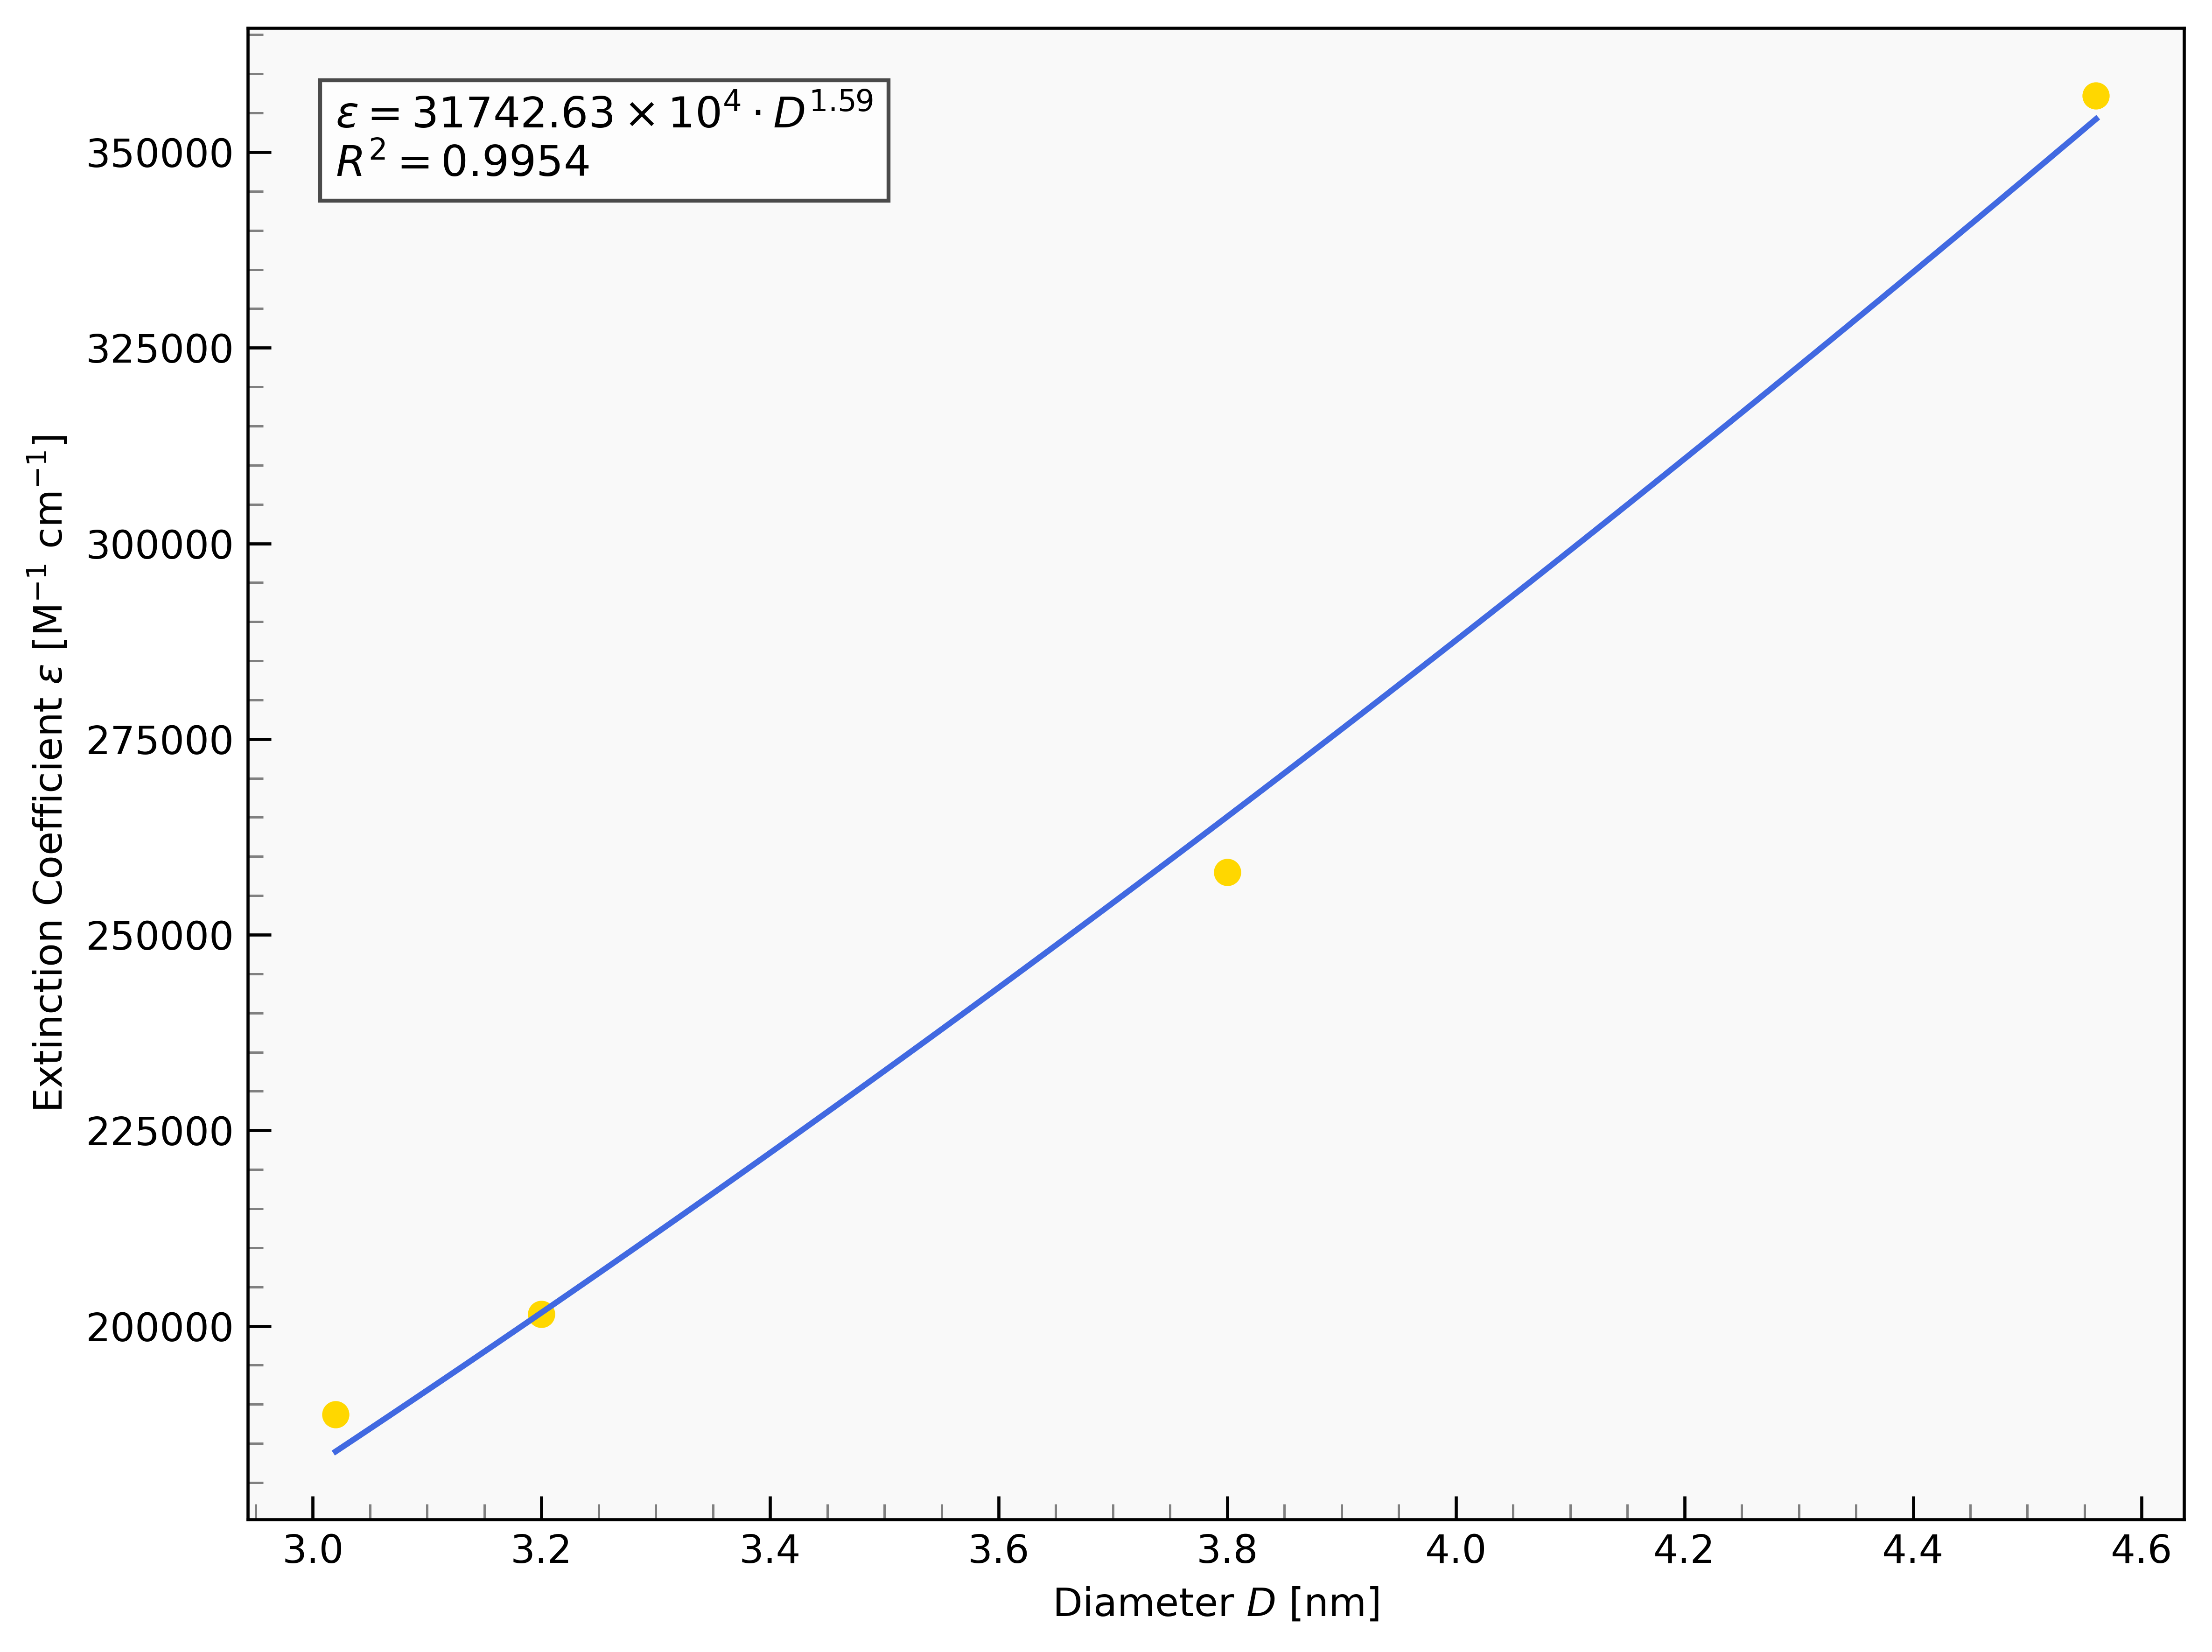

Fitted power law equation:
ε = 3.17e+04 * D^1.59
R² = 0.9954


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

diameters_nm = np.array([4.56, 3.80, 3.20, 3.02])
epsilon = np.array([3.572e5, 2.580e5, 201503.009986328, 1.887e5])

def power_law(x, A, p):
    return A * x**p

# Fit power law
popt, _ = curve_fit(power_law, diameters_nm, epsilon)
A, p = popt

# Calculate R-squared
y_pred = power_law(diameters_nm, *popt)
ss_res = np.sum((epsilon - y_pred) ** 2)
ss_tot = np.sum((epsilon - np.mean(epsilon)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Generate smooth curve for plotting
x_fit = np.linspace(min(diameters_nm), max(diameters_nm), 100)
y_fit = power_law(x_fit, *popt)

# Plot
plt.figure(1, figsize=(8, 6), dpi=600)
plt.plot(diameters_nm, epsilon, 'o', color='gold', label='Data')
plt.plot(x_fit, y_fit, '-', color='royalblue', label='Power Law Fit')

# Labels and annotation inside upper left
plt.xlabel(r'Diameter $D$ [nm]')
plt.ylabel(r'Extinction Coefficient $\varepsilon$ [M$^{-1}$ cm$^{-1}$]')
plt.text(
    min(diameters_nm), max(epsilon),
    rf"$\varepsilon = {A:.2f} \times 10^{{{int(np.log10(A))}}} \cdot D^{{{p:.2f}}}$" + "\n" + rf"$R^2 = {r_squared:.4f}$",
    fontsize=11, verticalalignment='top',
    bbox=dict(facecolor='white', alpha=0.7)
)


# Styling
plt.gca().set_facecolor('#f9f9f9')
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=False, right=False)
plt.tick_params(which='minor', length=4, color='gray')
plt.tick_params(which='major', length=6)
plt.tight_layout()
plt.show()

print(f"Fitted power law equation:")
print(f"ε = {A:.2e} * D^{p:.2f}")
print(f"R² = {r_squared:.4f}")

In [ ]:
import pandas as pd
import numpy as np

file_path = r"C:\Users\emmak\github\TP-GC-BA6\Physical\Challenge 2\UVvisgraph.xlsx"

df = pd.read_excel(file_path, decimal=",")
df.rename(columns={df.columns[0]: "Wavelength"}, inplace=True)

df.columns = df.columns.map(str)

peak_wavelengths = {
    "Sample 1 - blank": 557.49,
    "Sample 2 - blank": 599.51,
    "Sample 4 - blank": 579.51,
    "Sample 5 - blank": 549.00
}

extinction_coeffs = {
    "Sample 1 - blank": 2.015e5,
    "Sample 2 - blank": 3.572e5,
    "Sample 4 - blank": 2.580e5,
    "Sample 5 - blank": 1.887e5
}

path_length = 1

def get_absorbance_at_wavelength(df, column, target_wavelength):
    idx = (np.abs(df["Wavelength"] - target_wavelength)).idxmin()
    return df.loc[idx, column]

concentrations = {}

for sample_col, wl in peak_wavelengths.items():
    if sample_col in df.columns:
        A = get_absorbance_at_wavelength(df, sample_col, wl)
        epsilon = extinction_coeffs[sample_col]
        c = A / (epsilon * path_length)
        concentrations[sample_col] = (A, c)
    else:
        print(f"Column '{sample_col}' not found in data.")

for sample, (absorbance, conc) in concentrations.items():
    print(f"{sample}: Absorbance = {absorbance:.4f}, Concentration = {conc:.4e} M")


Sample 1 - blank: Absorbance = 0.6364, Concentration = 3.1583e-06 M
Sample 2 - blank: Absorbance = 0.3363, Concentration = 9.4154e-07 M
Sample 4 - blank: Absorbance = 0.3271, Concentration = 1.2680e-06 M
Sample 5 - blank: Absorbance = 0.0963, Concentration = 5.1040e-07 M
